# NYC High School Directory Exploration

## Objectives

In this notebook I will explore a real world dataset.

The main tasks will be the following:

1. Loading libraries and the dataset using pandas and cleaning the column names 
   - lowercase, '_' instead of spaces, no special characters
2. Filtering the dataset for schools located in Brooklyn
3. Answering the following questions:
   - How many total schools are in Brooklyn?  
   - How many schools in Brooklyn offer Grade 9 entry?  
4. Grouping and summarizing:
   - Count of unique schools per borough
   - Average number of students per borough
   - Summary of `grade_span_max` grouped by borough
5. Visualizations
6. Key insights


### 1. Loading libraries and dataset, cleaning column names

In [47]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [48]:
df = pd.read_csv("day_2_datasets/high-school-directory.csv")
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

The dataset contains 435 rows and 69 columns.


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [49]:
missing = df.isna().sum()
missing = missing[missing > 0].reset_index()
missing.columns = ["column", "missing_count"]
missing["missing_pct"] = (missing["missing_count"] / len(df)) * 100

missing = missing.sort_values(by="missing_count", ascending=False)

display(missing)

,column,missing_count,missing_pct
38,priority08,434,99.770115
40,priority10,434,99.770115
39,priority09,434,99.770115
37,priority07,431,99.080460
36,priority06,418,96.091954
2,expgrade_span_min,404,92.873563
3,expgrade_span_max,402,92.413793
35,priority05,396,91.034483
14,online_ap_courses,371,85.287356
26,partner_financial,363,83.448276


In [50]:
print(df.columns)

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [51]:
# Cleaning column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
     # .str.replace(r'\s+', '_', regex=True)            # for more universal usage
     #  .str.replace(r'[^a-z0-9_]', '', regex=True)     # for more universal usage
)
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

### 2. Filtering for 'Brooklyn'

In [52]:
df_brooklyn = df[df["borough"].str.casefold() == "brooklyn"]    # .casefold() for case insensitive comparison
df_brooklyn.shape

(121, 69)

Nearly 1/3 of all entries are related to the Brookly borough.

### 3. Questions

#### How many total schools are in Brooklyn?

In [53]:
total_schools_brooklyn = df_brooklyn["dbn"].nunique()
print(f"There are {total_schools_brooklyn} unique schools in Brooklyn.")  

There are 121 unique schools in Brooklyn.


#### How many schools in Brooklyn offer Grade 9 entry?

In [56]:
print(df_brooklyn.columns)

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [59]:
print(df_brooklyn["grade_span_min"].value_counts())
print()
print(df_brooklyn["grade_span_max"].value_counts())

grade_span_min
9.0    98
6.0    23
Name: count, dtype: int64

grade_span_max
12    117
10      2
9       1
11      1
Name: count, dtype: int64


In [62]:
has_grade9 = df_brooklyn[(df_brooklyn["grade_span_min"] <= 9) & (df_brooklyn["grade_span_max"] >= 9)]
n_schools_with_grade9 = has_grade9["dbn"].nunique()
print(f"{n_schools_with_grade9} unique schools in Brooklyn offer Grade 9 entry.")

121 unique schools in Brooklyn offer Grade 9 entry.


### 4. Grouping and Summarizing

#### Count unique schools per borough

In [63]:
df_grouped = (df.groupby("borough")
                .agg(n_schools=("dbn", "nunique"))
                .reset_index()
             )
df_grouped

,borough,n_schools
0,Bronx,118
1,Brooklyn,121
2,Manhattan,106
3,Queens,80
4,Staten Island,10


#### Average number of students per borough

In [65]:
df_grouped_avg_students = (df.groupby("borough")
                             .agg(avg_students=("total_students", "mean"))
                             .reset_index()
                          )

# Round on whole numbers
df_grouped_avg_students["avg_students"] = df_grouped_avg_students["avg_students"].round(0).astype(int)

df_grouped_avg_students


,borough,avg_students
0,Bronx,490
1,Brooklyn,699
2,Manhattan,590
3,Queens,1047
4,Staten Island,1848


#### Summary of `grade_span_max` grouped by borough

In [66]:
grade_span_summary = (
    df.groupby("borough")["grade_span_max"]
      .describe()
      .reset_index()
)
print(grade_span_summary)

         borough  count       mean       std   min   25%   50%   75%   max
0          Bronx  118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
1       Brooklyn  121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
2      Manhattan  106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
3         Queens   80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
4  Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


### 5. Visualisations

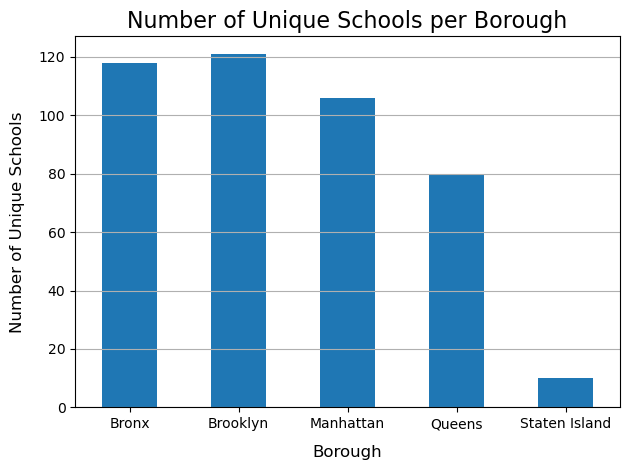

In [90]:
df_grouped.plot(kind="bar", x="borough", y="n_schools", legend=False)
plt.xlabel("Borough", fontsize=12, labelpad=10)
plt.ylabel("Number of Unique Schools", fontsize=12, labelpad=10)
plt.title("Number of Unique Schools per Borough", fontsize=16)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Brooklyn and the Bronx have the largest number of high schools, while Staten Island has very few. Maybe this reflects the differences in population across the boroughs.

<Figure size 800x500 with 0 Axes>

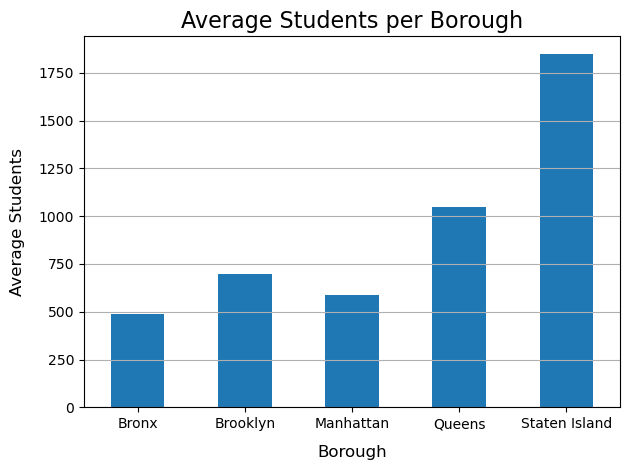

In [ ]:
df_grouped_avg_students.plot(kind="bar", x="borough", y="avg_students", legend=False)
plt.xlabel("Borough", fontsize=12, labelpad=10)
plt.ylabel("Average Students", fontsize=12, labelpad=10)
plt.title("Average Students per Borough", fontsize=16)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Staten Island stands out with a particularly high average number of students per school. In contrast, schools in the Bronx, Manhattan, and Brooklyn tend to be smaller on average.

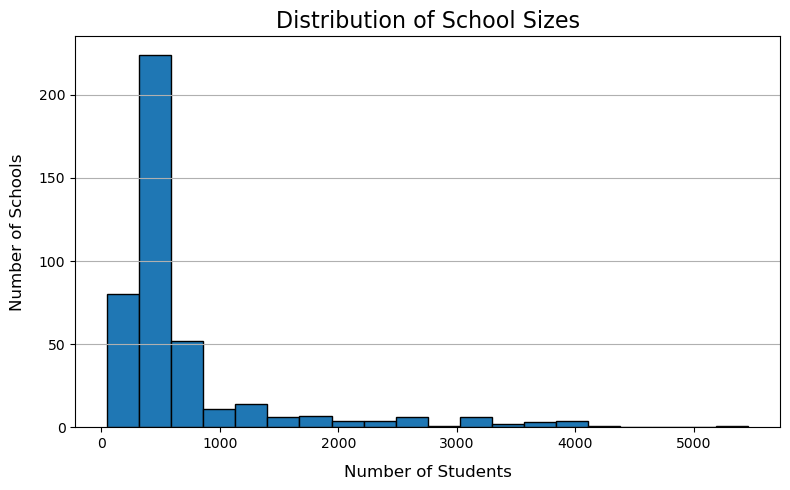

In [95]:
plt.figure(figsize=(8,5))
df["total_students"].plot(kind="hist", bins=20, edgecolor="black")
plt.xlabel("Number of Students", fontsize=12, labelpad=10)
plt.ylabel("Number of Schools", fontsize=12, labelpad=10)
plt.title("Distribution of School Sizes", fontsize=16)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Most NYC high schools have fewer than 1,000 students, with a clear concentration between 200 and 800. Only a small number of schools have very large enrollments (over 3,000 students), which appear as outliers in the distribution. This suggests that the majority of schools operate on a relatively smaller scale, while a few very large institutions drive the upper tail.

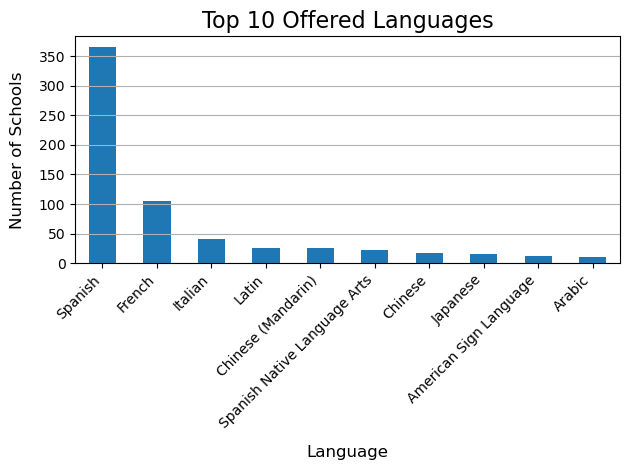

In [93]:
df_grouped_languages = (
    df["language_classes"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
)
df_grouped_languages.columns = ["language", "n_schools"]

df_grouped_languages.head(10).plot(
    kind="bar", x="language", y="n_schools", legend=False
)
plt.xlabel("Language", fontsize=12, labelpad=10)
plt.ylabel("Number of Schools", fontsize=12, labelpad=10)
plt.title("Top 10 Offered Languages", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Spanish is by far the most commonly offered language across NYC high schools, followed by French and Italian. Other languages such as Latin, Chinese (Mandarin), and Japanese are available but only at a much smaller number of schools. This highlights the strong emphasis on Spanish as the primary foreign language option in the school system.

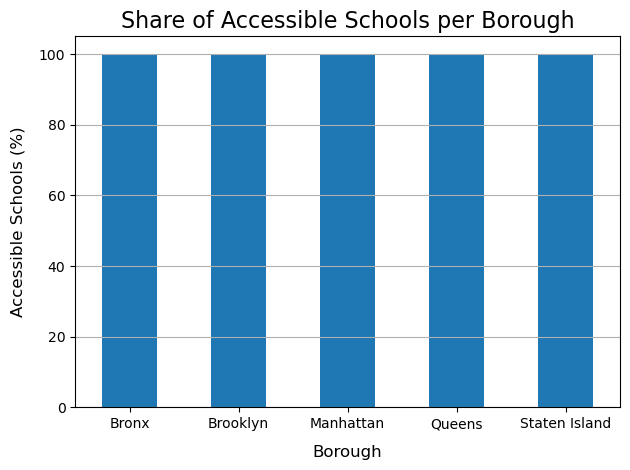

In [94]:
df_grouped_access = (
    df.assign(accessible=df["school_accessibility_description"].str.contains("accessible", case=False, na=False))
      .groupby("borough")["accessible"]
      .mean()
      .reset_index()
)

df_grouped_access["accessible"] = df_grouped_access["accessible"] * 100  # Prozent

df_grouped_access.plot(kind="bar", x="borough", y="accessible", legend=False)
plt.xlabel("Borough", fontsize=12, labelpad=10)
plt.ylabel("Accessible Schools (%)", fontsize=12, labelpad=10)
plt.title("Share of Accessible Schools per Borough", fontsize=16)
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

All boroughs report 100% of schools as accessible according to the dataset. While this uniformity may reflect a data-entry convention rather than reality, it suggests that accessibility is considered a standard feature across all NYC high schools.

### 6. Key insights

- **Dataset scope:** 435 rows, 69 columns.  
- **Data quality:** Many fields are sparsely populated (e.g., `priority07–10` ~99% missing; expected grade span fields `expgrade_span_min/max` >92% missing). Core fields (`total_students`, `grade_span_min/max`) are mostly complete.  
- **Brooklyn focus:** 121 unique schools in Brooklyn, and **all 121 offer Grade-9 entry** (`grade_span_min ≤ 9` and `grade_span_max ≥ 9`).  
- **Schools per borough (unique DBNs):** Brooklyn (121) and Bronx (118) lead; Manhattan (106), Queens (80), Staten Island (10).  
- **Average students per school:** Staten Island (~1,848) and Queens (~1,047) are much larger on average; Brooklyn (~699), Manhattan (~590), Bronx (~490) are smaller.  
- **Grade span (max grade) by borough:** Nearly all boroughs cluster at **grade 12** as the max; variation is minimal (means ≈ 11.8–12.0, tiny std; Staten Island is 100% at 12).  
- **Languages plot:** Spanish dominates by a wide margin; French and Italian follow—others appear only at small counts.  
- **School size distribution:** Most schools are between ~200–800 students; a few very large schools create a long right tail (outliers >3,000).  
- **Accessibility plot:** Dataset reports 100% “accessible” across boroughs—likely a data-entry convention rather than a nuanced reality.

The analysis shows that Brooklyn and the Bronx host the largest number of high schools, while Staten Island has only a few but much larger ones on average. Nearly all schools span up to grade 12, and every school in Brooklyn offers grade-9 entry. Spanish is by far the most common foreign language, with French and Italian trailing behind. Most schools are relatively small (200–800 students), with only a few outliers above 3,000. Interestingly, the dataset reports 100% accessibility across all boroughs, which likely reflects a data-entry convention rather than the actual situation.